# Descriptive statistics

## 1 Setup

First, setup the database

In [1]:
from utils import setup_spreadr
setup_spreadr('spreadr_exp_1')

Then import all we need for the analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.metrics import edit_distance
import numpy as np
from pandas import DataFrame
import seaborn as sb

from gists.models import Sentence, Profile

from utils import memoized

And equip our models with useful tools: head of a sentence, easy narrowing of a queryset to a bucket

In [3]:
from utils import equip_spreadr_models as utils_equip
utils_equip()

## Interaction of profile variables

First equip our models with some distances and content extraction tools

In [4]:
from linguistics import equip_spreadr_models as linguistics_equip
linguistics_equip()

Then compute the variables

In [5]:
profiles = Profile.objects.all()
raw_rates = []
ordered_content_rates = []
word_span_scores = []
ages = []
genders = []
job_types = []
print('Computing variables on {} profiles...'.format(len(profiles)), end='')
for i, profile in enumerate(profiles):
    try:
        print(' {}'.format(i + 1), end='')
        raw_rates.append(profile.transformation_rate('raw'))
        ordered_content_rates.append(profile.transformation_rate('ordered_content'))
        word_span_scores.append(profile.word_span.score)
        ages.append(profile.questionnaire.age)
        genders.append(profile.questionnaire.gender)
        job_types.append(profile.questionnaire.job_type)
    except ValueError:
        # Profile has no reformulations
        pass

profiles_interactions = DataFrame({'raw transformation rate': raw_rates,
                                   'ordered content transformation rate': ordered_content_rates,
                                   'word span score': word_span_scores,
                                   'age': ages,
                                   'gender': genders,
                                   'job type': job_types})

Computing variables on 66 profiles... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66

And plot them, first with gender as color

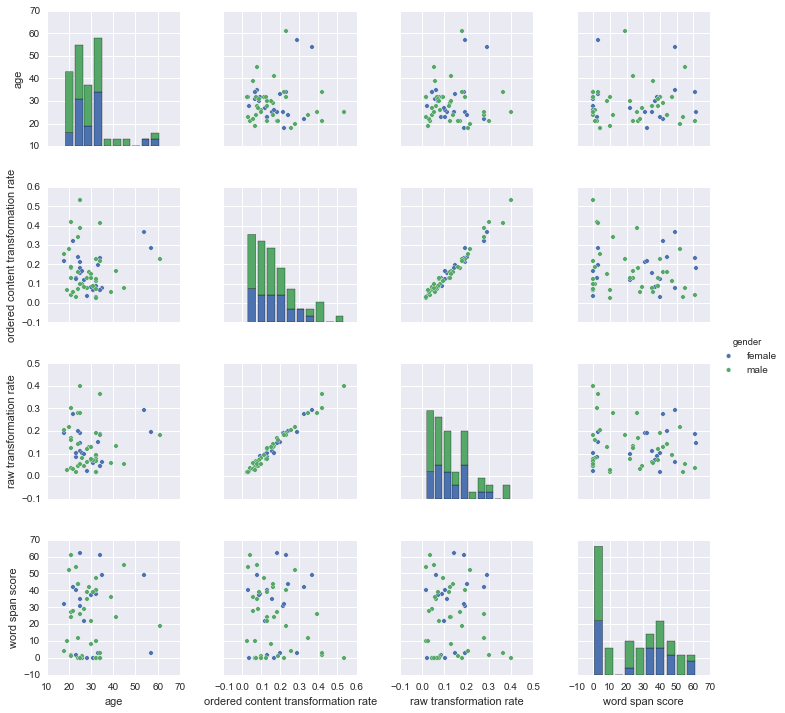

In [6]:
sb.pairplot(profiles_interactions, hue='gender');

Then with job type as color

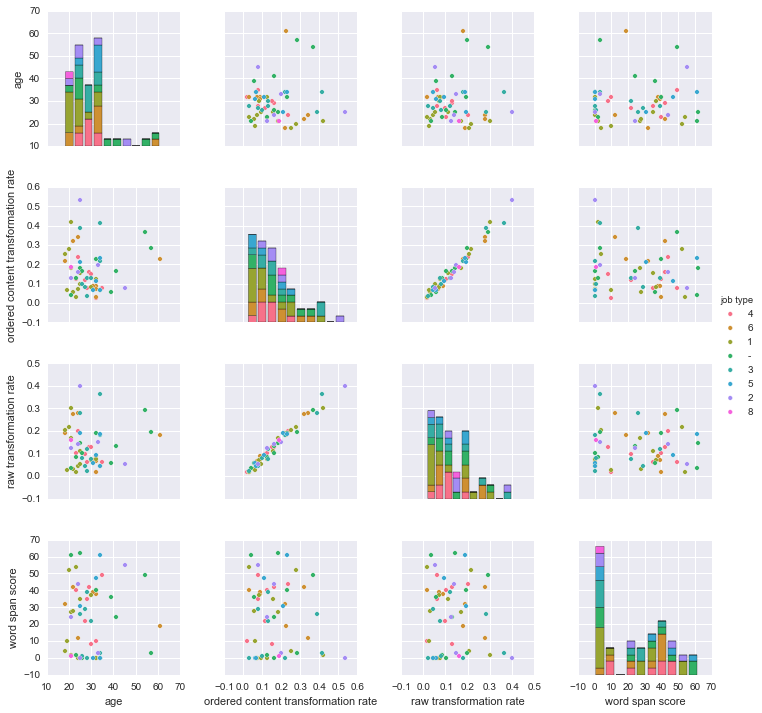

In [7]:
sb.pairplot(profiles_interactions, hue='job type');